# Fourier Transform
***

The Fourier transform is used to convert a sequence of samples in the time domain into an array of complex numbers of the same size in the frequency domain.

An example of an algorithm that can calculate the Fourier transform is the discrete Fourier transform (DFT); you are more likely to see the fast Fourier transform (FFT) being used.

As seen in the implementation below, the time complexity of the DFT is $n^2$, making it impractical for large sample sizes. The FFT is a more efficient algorithm that calculates the DFT with a lower time complexity.

This is the equation for the discrete Fourier transform:<br>
$
y[k] = \sum_{n=0}^{N-1}
e^{-2 \pi j \frac{kn}{N}} x[n]
$

***
### Fast Fourier Transform

Instead of writing your own implementation of the FFT, you can use the FFT function provided by `scipy` module (`scipy.fft.fft`), there is also an implementation in the `numpy` library (`numpy.fft.fft`).
Both of these implementations  have been fine-tuned for high performance.

In [1]:
import random
import numpy as np, numpy.fft, scipy.fft

rand_number_array = np.array([random.random() for i in range(4)])
print(rand_number_array)

[0.2082897  0.48079456 0.54747267 0.5138279 ]


In [2]:
print(numpy_fft_output := numpy.fft.fft(rand_number_array))
print(scipy_fft_output := scipy.fft.fft(rand_number_array))

[ 1.75038483+0.j         -0.33918297+0.03303335j -0.23886009+0.j
 -0.33918297-0.03303335j]
[ 1.75038483-0.j         -0.33918297+0.03303335j -0.23886009-0.j
 -0.33918297-0.03303335j]


### Inverse Fast Fourier Transform

The inverse works as you would expect it to; you can convert the output of the FFT back into its original form, and although the return value is of a complex type, it is trivial to extract the real part, which I demonstrate below.

In [3]:
print(numpy_ifft_output := numpy.fft.ifft(numpy_fft_output))
print(scipy_ifft_output := scipy.fft.ifft(scipy_fft_output))

[0.2082897 +0.j 0.48079456+0.j 0.54747267+0.j 0.5138279 +0.j]
[0.2082897 +0.j 0.48079456+0.j 0.54747267-0.j 0.5138279 +0.j]


In [4]:
print([i.real for i in numpy_ifft_output])
print([i.real for i in scipy_ifft_output])

[0.20828969788056811, 0.48079455816319205, 0.5474726709975299, 0.5138279036511504]
[0.20828969788056811, 0.48079455816319205, 0.5474726709975299, 0.5138279036511504]


In [5]:
print("Did inverse FFT work correctly?:", all(numpy.isclose(rand_number_array, numpy_ifft_output)))

Did inverse FFT work correctly?: True


***
## 1. Time vs Frequency Domain

Time and frequency are two different ways of representing and analyzing signals. A signal is a sequence of data that varies over time, such as the intensity (loudness) and pitch (frequency) of sound. Time and frequency are important for understanding how a signal changes over time and for identifying the different components of a signal.

For example, a signal can be represented in the time domain by plotting its values over time, or it can be transformed into the frequency domain to reveal the different frequency components that make up the signal.

***
## 2. Implementation of the DFT Algorithm

Here is an implementation of the discrete Fourier transform (DFT) algorithm in Python.

The Python implementation of the DFT below is derived from Ian McLoughlin's `04-fourier-transform.ipynb` notebook.

In [6]:
# This implementation should make the inefficiency of the DFT clear.
# Two for loops, one nested, looping through 0 < N
# N * N = O(n^2)

def dft(x_array):
    N = len(x_array) # Size of input
    
    # Pre-allocate the output array
    y_array = [*range(N)]

    # Loop for every element in the array
    for k in range(N):
        y_k = 0
        for n in range(N):
            y_k += (np.e ** (-2 * np.pi * 1j * k * n / N) * x_array[n])
        y_array[k] = y_k
        
    return y_array

## 3. Generating a Sinusoidal Signal

A sinusoidal signal commonly known as the sine-wave can be described by the following properties described below.

$
x(t) = A
\sin(2 \pi f t + \phi)
$

- $A$ = Signal amplitude
- $f$ = Signal frequency
- $t$ = Time in seconds
- $\phi$ = phase_shift

The Python code below will generate a signal using the formula above. You can adjust the properties and it will generate a new signal for you.

In [7]:
import ipywidgets # For the sliders below
import matplotlib.pyplot as plt # Plotting library

# Number of samples to generate
sample_count = random.randint(100, 200)

# Spaces between the samples
sample_interval = 1 / sample_count

# Generate time vector from 0 to 1 wih sample_interval intervals
time_vector = np.arange(0, 1, sample_interval)

def plot_signal(signal):
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Amplitude")

    # Plot the time-domain signal
    ax.plot(time_vector, signal)
    plt.show()
    
def generate_signal(amplitude=1, frequency=10, phase_shift=0):
    # Make it global so it can accessed below
    global my_signal

    # Generating the sinusoidal signal
    my_signal = amplitude * np.sin(2 * np.pi * frequency * time_vector + phase_shift)
    
    # Plot our new signal
    plot_signal(my_signal)
    
display(ipywidgets.interactive(generate_signal, amplitude=(1, 100), frequency=(10, 200), phase_shift=(0, 20)))

interactive(children=(IntSlider(value=1, description='amplitude', min=1), IntSlider(value=10, description='fre…

***
### Converting to Frequency Domain

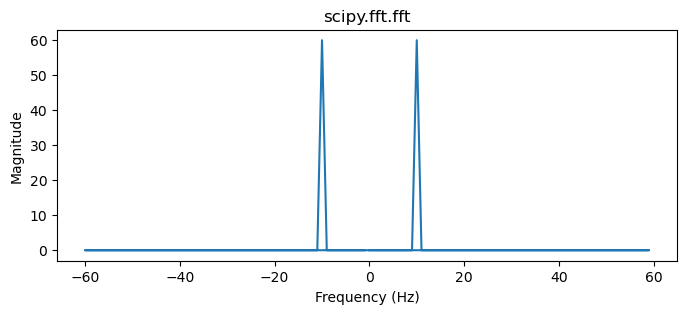

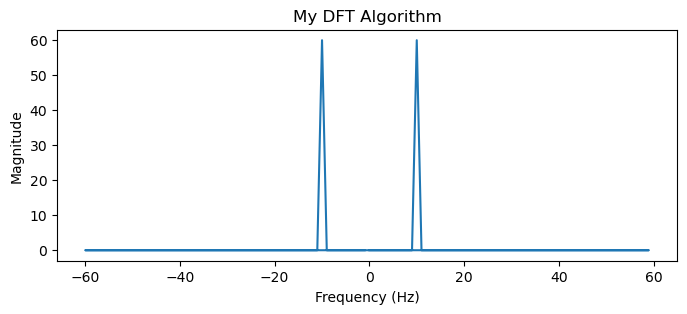

In [8]:
import scipy.fft

dft_algorithm_list = [
    (scipy.fft.fft, "scipy.fft.fft"),
    (dft, "My DFT Algorithm")
]

# Iterate over the list of DFT algorithms
for func, title in dft_algorithm_list:
    # Calculate the frequency domain using the current DFT function
    frequency_domain = np.abs(func(my_signal))
    
    # Calculate the frequency vector using the sampling interval
    frequency_vector = scipy.fft.fftfreq(time_vector.shape[-1], sample_interval)

    # Plot the frequency domain
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Magnitude")
    ax.set_title(title)
    ax.plot(frequency_vector, frequency_domain)
    plt.show()

## 4. Plots of Parabolas

A parabola is a curve that has a symmetrical U-shape it can either curve upwards or downwards, depending on what quadratic function was plotted.
Any quadratic function will produce a parabola when plotted.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
quadratic_func_list = [
    lambda x: x ** 2,
    lambda x: (x ** 2) - 4,
    lambda x: (x ** 2) + 4,
    lambda x: (-x ** 2) + 4
]

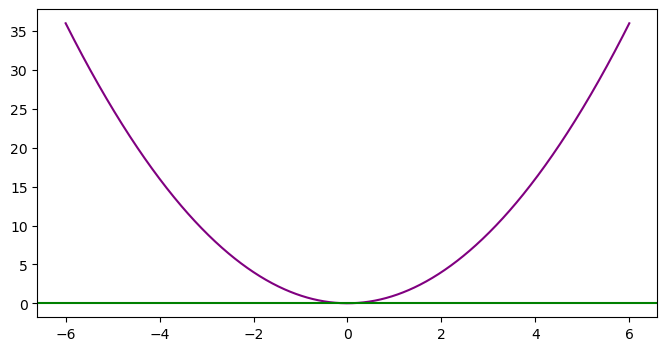

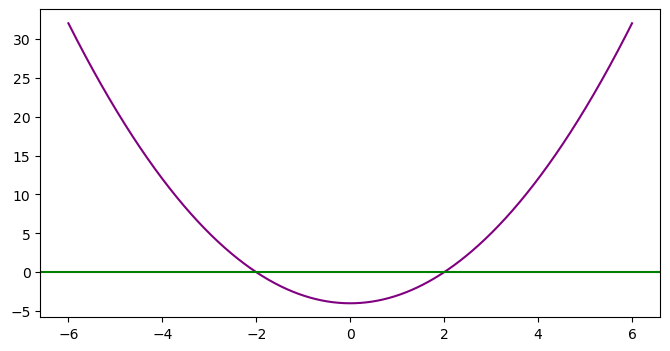

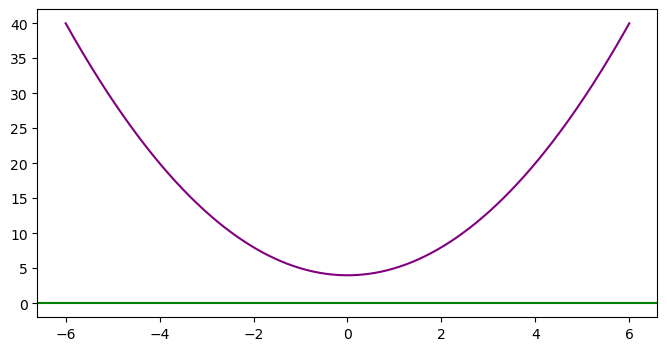

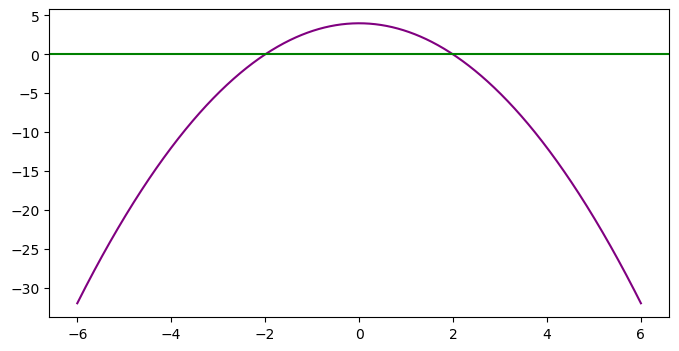

In [11]:
# Range of x values.
x = np.linspace(-6.0, 6.0, 1000)

for quadratic_func in quadratic_func_list:
    # Create figure.
    fig, ax = plt.subplots(figsize=(8,4))

    # Plot using matplotlib.
    ax.plot(x, quadratic_func(x), color="purple")

    # Plot x axis.
    ax.axhline(0.0, color="green");

## 5. Quadratic Formula

The following is the form that a quadratic equation must take, its a polynomial with three parts:

$f(x): ax^2 + bx + c$

The quadratic formula is used to find the two values of x of a quadratic function, the roots will satisfy the function.

## References

* https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/04-fourier-transform.ipynb<br>
* https://en.wikipedia.org/wiki/Fourier_transform<br>
* https://en.wikipedia.org/wiki/Fast_Fourier_transform<br>
* https://en.wikipedia.org/wiki/Sinusoidal_wave<br>
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html<br>